## 학습 목포
* 기업이 처한 상황을 인식하고 문제를 정의
* **군집분석(Cluster Analysis)**의 개념 이해
* **상관분석**을 통해 데이터 간 관계 파악

## 1. 상황 인식

* 게임 플레이어어의 게임 경험을 만족 시키고 유지시키기 위한 안정적인 운영전략 필요
* 게임 플레이어들의 데이터를 이용해 플레이어들이 게임에 더 몰입 할수 있도록 ___필요한 업데이트 요소___가 무엇인지 찾아야 함

## 2. 문제 정의

> 핵심문제: 우리 VIP고객들은 어떤 게임플레이를 하고 있을까?


* VIP 정의 : 우리 게임에 많은 시간을 보낸 사람 
* VIP 고객들의 게임 내 행동 패턴 분석
  * VIP 고객들이 하고 있는 게임플레이 종류 파악
* ___VIP 고객들이 즐겨하는 게임 컨텐츠의 업데이트 수행___




우리 게임에 많은 시간을 보낸 사람들을 다시 VIP로 정의하고,
VIP고객들의 게임 내 행동 패턴을 분석

고객들의 레벨점수와 시간점수를 이용해 군집분석으로 VIP고객을 정의하고 VIP고객이 보이는 게임 내 플레이 유형을 도출

VIP고객들이 즐겨하는 플레이를 유도하는 게임 업데이터를 수행하면 다른 고객분들과 함께 우리 게임을 더 오래, 많이 즐겨주지 않을까요?

## 3.데이터 분석

In [71]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# customer_data 변수를 만들고 customer_for_cluster.csv 파일의 데이터를 할당
customer_data = pd.read_csv('./customer_for_cluster.csv')

# customer_data의 head 값 확인하기
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [72]:
len(customer_data.ID.unique())
customer_data.Status.value_counts()
customer_data.Game_Name.value_counts()

18506

play        16685
purchase     1821
Name: Status, dtype: int64

Mine Ground    18506
Name: Game_Name, dtype: int64

In [73]:
# customer_data의 정보 확인하기
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


속성 확인
* Level_score(레벨점수: 플레이어들이 획득한 게임 내 레벨 점수)
* Time_score(시간점수: 플레이어들이 플레이한 게임 내 시간 점수)
* PK(플레이어킬: 게임 안에서 PK한 횟수를 수치화)
* BOSS(보스플레이: 게임 안에서 BOSS를 잡은 횟수를 수치화)
* Gacha(가챠플레이: 게임 안에서 아이템을 구매한 횟수를 수치화)
* Attack(어택포인트: 게임 안에서 몬스터를 사냥한 횟수를 수치화)
* Mining(마이닝포인트: 게임 안에서 채집, 수집 등 자원채취 횟수를 수치화)

</hr>

VIP 고객 분류 : Level_score, Time_score 이용한 군집 분석  
VIP 고객 들의 플레이 유형 파악



#### 군집 분석

* Level_score와 Time_score를 이용해 게임 내 VIP고객 분류  
* 군집분석(Cluster Analysis) 사용
  * 사이킷런(Sklearn)의 KMeans clustering 


,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


<AxesSubplot:ylabel='Density'>

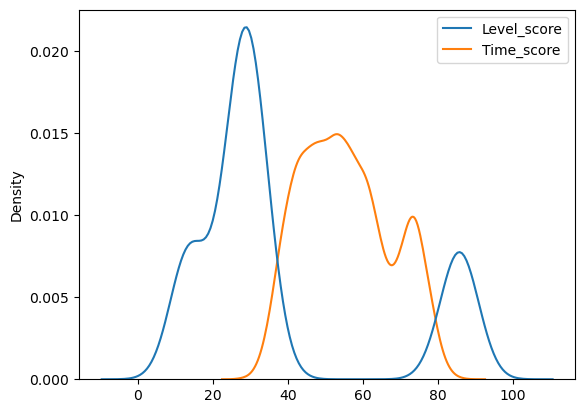

In [92]:
# sklearn라이브러리 중 필요한 모듈을 호출
from sklearn.cluster import KMeans
from sklearn import preprocessing

# customer_data 중 Level_score와 Time_score를 골라내 temp_var로 저장
temp_var = customer_data[['Level_score','Time_score']]
temp_var

sns.kdeplot(data=temp_var)

정규화 

sklearn의 preprocessing 모듈 내의 StandardScaler()함수는 할당받은 값의 스케일을 조정  
즉, 데이터셋의 값들이 보이는 편차가 지나치게 크거나, 고르지 않은 경우 데이터 셋의 값을 0~1사이의 값으로 조정합니다.

표준정규분포로 변환  
fit()함수는 데이터셋의 평균과 표준편차를 계산합니다.  
transform()함수는 데이터셋의 평균과 표준편차를 각각 0과 1로 전환합니다. 


array([[ 1.81757446,  1.30779766],
       [ 1.89747158,  1.45885402],
       [ 1.80852439,  1.26325983],
       ...,
       [-0.278779  , -1.47210294],
       [-0.33893592,  0.79156792],
       [-0.81119341, -1.03500583]])

<AxesSubplot:ylabel='Density'>

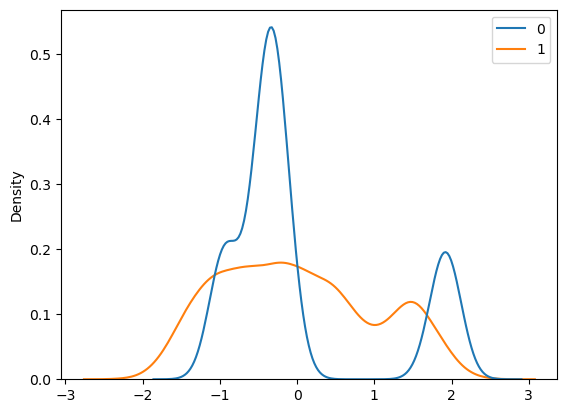

In [75]:
# sklearn의 preprocessing을 이용해 temp_var의 각 값들을 정규화
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)
temp_var

sns.kdeplot(data=temp_var)

군집분석 : 각 파라미터 최적화

In [76]:
# 군집분석을 하기 위해 Kmeans 변수를 만들고 군집분석 초기 모델을 할당
Kmeans = KMeans(n_clusters=5, # 군집 개수는 5개 도출
                init='k-means++', # 모델 초기화 방법은 K-means++ 사용
                n_init=10, # 모델의 초기화 횟수 (초기화-학습 10회 반복 후 최선의 결과 선택)
                verbose=True, # 군집분석 수행 중 각 단계별 메세지 출력 여부
                max_iter=100, # 최대 반복 횟수
                random_state=1111 # 랜덤시드 고정
                               )

# 할당된 군집분석 모델에 temp_var를 적용(fit)
Kmeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 2497.8632079960976
Iteration 1, inertia 2200.8834380813596
Iteration 2, inertia 2092.3386161770704
Iteration 3, inertia 2007.5957692174873
Iteration 4, inertia 1945.6131933510815
Iteration 5, inertia 1906.2578810272882
Iteration 6, inertia 1885.3067588011156
Iteration 7, inertia 1873.7510076411127
Iteration 8, inertia 1866.96846709085
Iteration 9, inertia 1863.098496873764
Iteration 10, inertia 1861.151087867018
Iteration 11, inertia 1860.2433556391377
Converged at iteration 11: center shift 4.568322224962584e-05 within tolerance 0.00010000000000000034.
Initialization complete
Iteration 0, inertia 2652.9598170024806
Iteration 1, inertia 1997.1430467551234
Iteration 2, inertia 1915.4711878357043
Iteration 3, inertia 1886.9643132818062
Iteration 4, inertia 1873.6864541358068
Iteration 5, inertia 1866.7431300342557
Iteration 6, inertia 1862.9879945727541
Iteration 7, inertia 1861.1011652223424
Iteration 8, inertia 1860.2255695759538
Converged a

KMeans(max_iter=100, n_clusters=5, random_state=1111, verbose=True)

In [77]:
# 분류된 각 군집이름(Label)을 변수 Cluster_label로 할당
Kmeans.labels_
cluster_label = Kmeans.labels_

# 할당된 Cluster_label을 customer_data의 Cluster열 값으로 할당
customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

array([1, 1, 1, ..., 2, 3, 4])

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,3
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,3
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,2
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,3


In [78]:
# customer_data의 Cluster열의 각 고유값 계산하기
customer_data['Cluster'].value_counts().sort_index()

0    3915
1    3701
2    3698
3    3505
4    3687
Name: Cluster, dtype: int64

각 군집별 기술통계량 

In [79]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'Time_score': 'mean', 'Level_score':'mean', 'Payment':'mean'}).round(1)
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,54.3,27.7,932.1
1,73.6,85.7,1019.3
2,40.2,27.4,990.0
3,62.6,31.3,1019.7
4,47.8,14.6,861.0


In [80]:
temp_var.T

Cluster,0,1,2,3,4
Time_score,54.3,73.6,40.2,62.6,47.8
Level_score,27.7,85.7,27.4,31.3,14.6
Payment,932.1,1019.3,990.0,1019.7,861.0


1번 군집에 속한 고객들이 우리 게임의 VIP, 즉 상위랭커들이라고 볼 수 있음

시각화

Text(0.5, 1.0, 'Scatter Chart By Cluster')

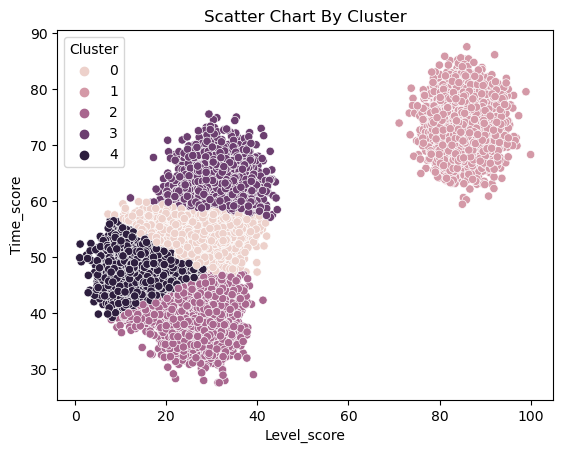

In [81]:
# 각 군집별 Level_score와 Time_score를 산포도로 시각화
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue='Cluster')
plt.title('Scatter Chart By Cluster')
plt.show()

막대그래프

In [82]:
# 시각화를 위해 temp_var의 결과값을 전처리합니다. 
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,54.3,27.7,932.1
1,1,73.6,85.7,1019.3
2,2,40.2,27.4,990.0
3,3,62.6,31.3,1019.7
4,4,47.8,14.6,861.0


[Text(0, 0, '28'),
 Text(0, 0, '86'),
 Text(0, 0, '27'),
 Text(0, 0, '31'),
 Text(0, 0, '15')]

Text(0.5, 1.0, 'level_score By Cluster')

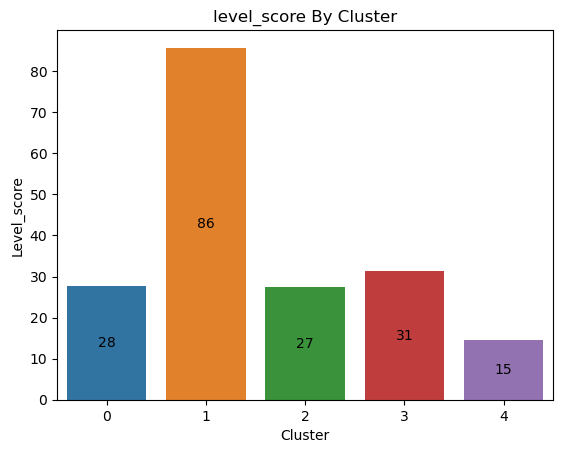

In [83]:
# 각 Cluster별 평균 Level_score를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('level_score By Cluster')
plt.show()

[Text(0, 0, '54'),
 Text(0, 0, '74'),
 Text(0, 0, '40'),
 Text(0, 0, '63'),
 Text(0, 0, '48')]

Text(0.5, 1.0, 'Time_score By Cluster')

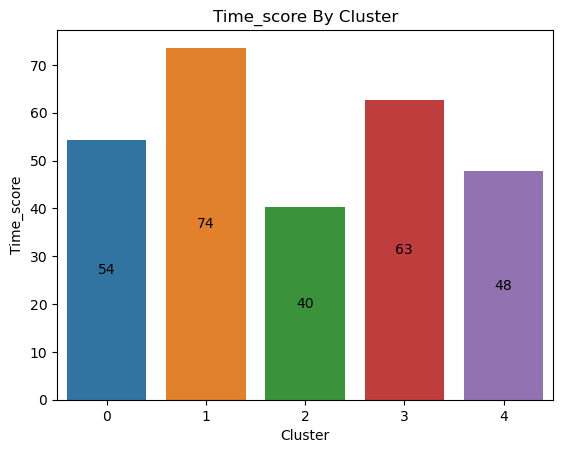

In [84]:
# 각 Cluster별 평균 Time_score를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Cluster', y='Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Time_score By Cluster')
plt.show()

각 군집별 Level_score와 Time_score는 확실히 차이가 많이 발생하고 있습니다.
특히 Time_score에서 2번 군집은 평균 40점을 보이고, 1번 군집과 45% 정도나 차이가 나고 있네요.

**이 고객들을 어떻게 하면 조금 더 오랫동안 게임을 하게 할 수 있을까요?**

Time_score에 영향을 미치는 게임 행동들을 찾아내기 위해
Pandas에서 제공하는 상관관계 분석 함수 corr()을 사용해보겠습니다.

In [85]:
# customer_data의 Time_score, PK, BOSS, Gacha, Attack, Mining의 열값을 골라내고 상관관계분석하기
corr_data = customer_data[['Time_score', 'PK', 'BOSS', 'Gacha', 'Attack', 'Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap By Correlation')

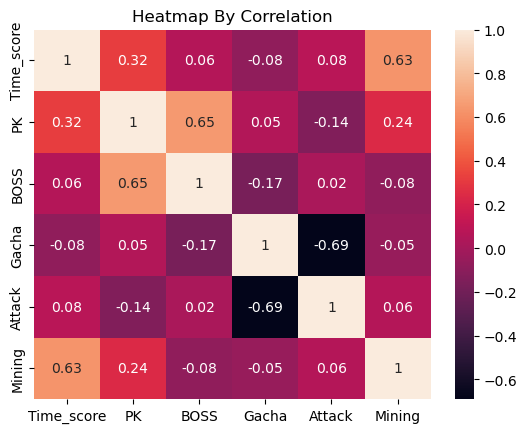

In [86]:
# 상관관계분석 결과 시각화하기 
sns.heatmap(data = corr_data, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

Time_score와 가장 높은 상관관계를 보이는 건 PK와 Mining이고 나머지 행동 요소들은 비슷한 수준을 보이고 있네요.
**게임 유지 업데이터를 위한 힌트**가 도출되고 있는 것 같습니다.

### Radar Chart(스파이더차트)를 이용한 집계결과 시각화

* VIP(상위유저)들이 모여있는 1번 클러스터의 게임 내 행동양식을 한번 도출
** Radar Chart 이용
** Time_score와 Level_score가 높은 1번 클러스터와 Time_score와 Level_score가 낮은 4번 클러스터를 직접적으로 비교

In [87]:
# customer_data의 Cluster를 기준으로 PK, BOSS, Gacha, Atteck, Mining의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'PK': 'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


In [88]:
temp_var.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Cluster')

In [89]:
# 집계결과 시각화를 위한 전처리
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=True)
temp_var

,PK,BOSS,Gacha,Attack,Mining
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


* Radar Chart  
1번과 4번 군집의 게임행동 차이 비교

<Figure size 800x800 with 0 Axes>

([<matplotlib.projections.polar.ThetaTick at 0x19f52adfe20>,
 [Text(0.0, 0, 'PK'),
  Text(1.2566370614359172, 0, 'BOSS'),
  Text(2.5132741228718345, 0, 'Gacha'),
  Text(3.7699111843077517, 0, 'Attack'),
  Text(5.026548245743669, 0, 'Mining')])

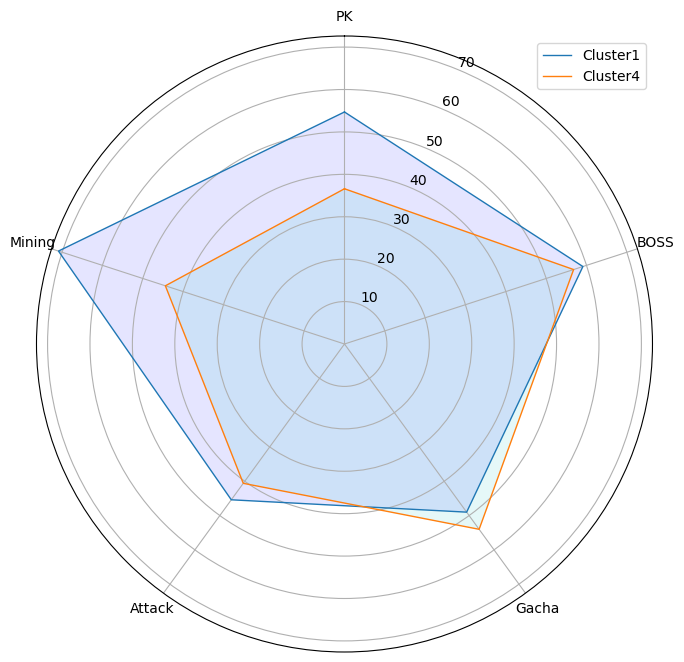

In [90]:
# Radar Chart를 이용한 집계결과 시각화
from math import pi

# Radar Chart의 각 방향 개수 정의
categories=list(temp_var)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(8,8)) #차트 크기
ax = plt.subplot(111, polar=True) #sub차트 생성

# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 레이더차트에 Cluster1 표기
values = temp_var.loc[1].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster4 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster4')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()

### 분석결과

군집분석을 이용해 게임에 몰입하고 있는 VIP고객들을 발견  
그리고 각 군집별 세부 게임 플레이 수준을 비교  
그 결과 **PK와 Mining에 관련한 게임 콘텐츠 업데이트**가 필요하다고 판단  

Time_score와 Level_score가 높은 1번 클러스터와 Time_score와 Level_score가 낮은 4번 클러스터를 직접 비교해보니 유의미한 결과가 도출  
___게임을 오래 즐기고, level이 높은 1번 클러스터의 고객들은 4번 클러스터 고객들보다 높은 수준의 Mining과 PK를 수행.___  
즉, **Mining와 PK에 집중된 게임 콘텐츠를 업데이트**하면 더 많은 고객들이 게임을 오랫동안 즐길 것으로 판단

## 4. 전략 수립 및 실행


1. Mine Ground의 경우 게임을 오랫동안 즐기는 1번 클러스터가 존재 함

2. 다른 클러스터의 고객들은 상대적으로 게임을 오래즐기지 않고, 레벨이 낮은 편임
3. 1번 클러스터 고객들이 게임 안에서 보이는 행동패턴을 파악하고, 다른 클러스터 고객들이 쉽게 따라할 수 있도록 업데이트 해보자.
4. 이번 업데이트를 통해서 사람들이 게임에 더 쉽게 몰입하고, 오랫동안 게임을 즐길 수 있을 것으로 판단.
5. 게임에 몰입하는데 필요한 다양한 콘텐츠들이 더 많이 존재할것으로 판단 됨
6. 하지만 우선 현재 게임에 몰입한 고객들의 행동을 벤치마킹해서
다른 고객들이 쉽게 따라할 수 있도록 업데이트를 하는 것이 시급해보임

즉, 더 활발한 Mining을 유도하기 위해서 다양한 채집아이템과 수집요소들을 제공하고,
NPC들이나 몬스터가 아닌 플레이어들 간 PK를 유도하기 위한 적절한 조치가 수행되면
기존 고객들은 더 몰입해서 게임을 할 수 있을 것으로 판단 됨

## 마무리

* 군집분석을 이용해 게임에 몰입하고 있는 VIP고객들을 발견   
* 각 군집별 세부 게임 플레이 수준을 비교   
* 그 결과 PK와 Mining에 관련한 게임 컨텐츠 업데이트가 필요하다는 결론 도출